In [1]:
from google.colab import files

uploaded = files.upload()

Saving ocupation.csv to ocupation.csv


krok 2
    user_id  age gender     occupation zip_code
0         1   24      M     technician    85711
1         2   53      F          other    94043
2         3   23      M         writer    32067
3         4   24      M     technician    43537
4         5   33      F          other    15213
5         6   42      M      executive    98101
6         7   57      M  administrator    91344
7         8   36      M  administrator    05201
8         9   29      M        student    01002
9        10   53      M         lawyer    90703
10       11   39      F          other    30329
11       12   28      F          other    06405
12       13   47      M       educator    29206
13       14   45      M      scientist    55106
14       15   49      F       educator    97301
15       16   21      M  entertainment    10309
16       17   30      M     programmer    06355
17       18   35      F          other    37212
18       19   40      M      librarian    02138
19       20   42      F      home

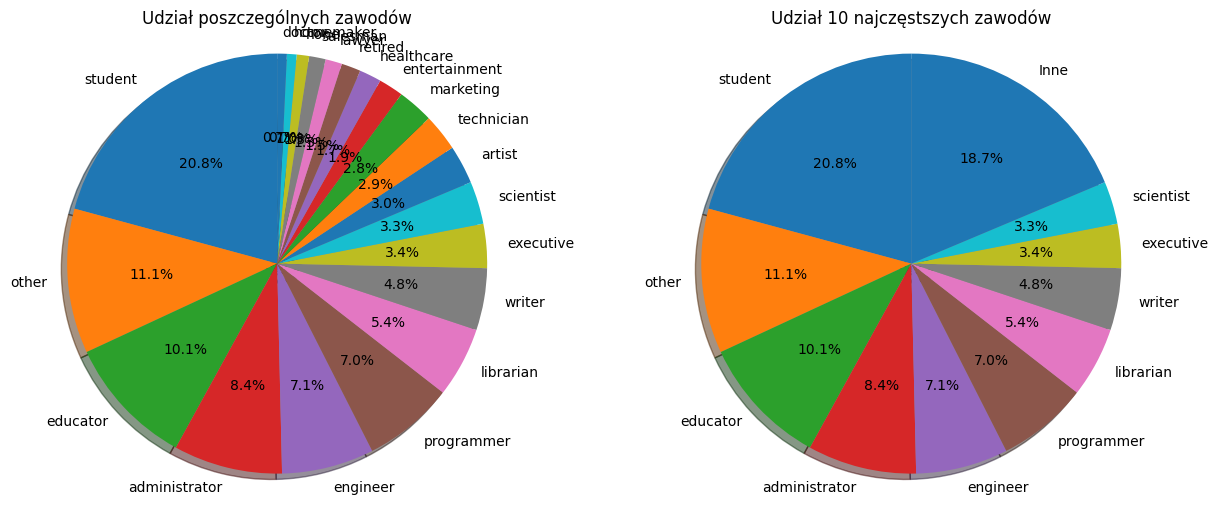

krok 8


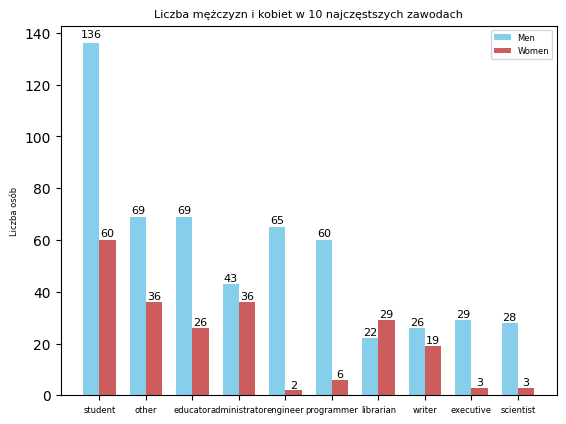

krok 9


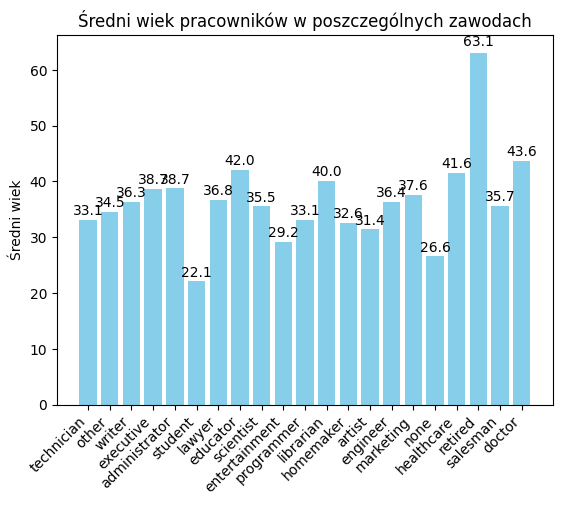

krok 10


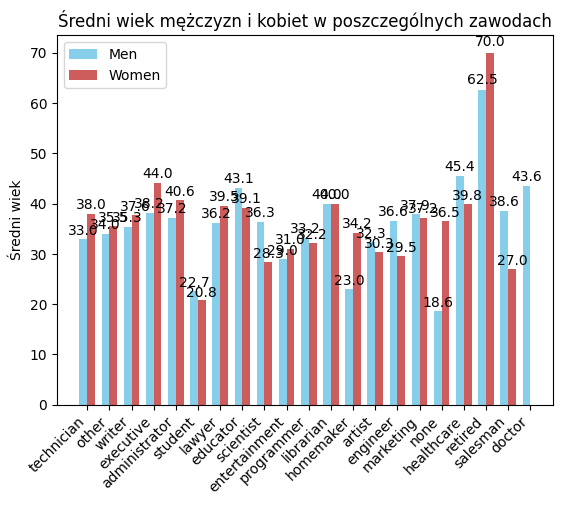

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#krok 1
sciezka_do_pliku = '/content/ocupation.csv'
ocupations = pd.read_csv(sciezka_do_pliku, sep='|')

#krok 2
print("krok 2")
print(ocupations.head(25))

#krok 3
print("krok 3")
print(ocupations.tail(10))

#krok 4
print("krok 4")
liczba_obserwacji, liczba_kolumn = ocupations.shape

print(f"Liczba obserwacji: {liczba_obserwacji}")
print(f"Liczba kolumn: {liczba_kolumn}")

#krok 5
print("krok 5")
nazwy_kolumn = ocupations.columns
print("Nazwy kolumn:")
for nazwa_kolumny in nazwy_kolumn:
    print(nazwa_kolumny)

#krok 6
print("krok 6")
liczba_zawodow = ocupations['occupation'].nunique()
print(f"Liczba różnych zawodów: {liczba_zawodow}")

#krok 7
print("krok 7")
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

#Wykres z wszystkimi zawodami
labels_wszystkie = ocupations['occupation'].value_counts().index
sizes_wszystkie = ocupations['occupation'].value_counts().values
ax[0].pie(sizes_wszystkie, labels=labels_wszystkie, autopct='%1.1f%%', shadow=True, startangle=90)
ax[0].axis('equal')
ax[0].set_title('Udział poszczególnych zawodów')

#Wykres z 10 najczęstszymi zawodami
najczestsze_zawody = ocupations['occupation'].value_counts().nlargest(10)
inne = ocupations['occupation'].value_counts().nsmallest(liczba_zawodow - 10).sum()
najczestsze_zawody['Inne'] = inne

labels_najczestsze = najczestsze_zawody.index
sizes_najczestsze = najczestsze_zawody.values
ax[1].pie(sizes_najczestsze, labels=labels_najczestsze, autopct='%1.1f%%',
          shadow=True, startangle=90)
ax[1].axis('equal')
ax[1].set_title('Udział 10 najczęstszych zawodów')

plt.show()

#krok 8
print("krok 8")
najczestsze_zawody = ocupations['occupation'].value_counts().nlargest(10).index

men_means = []
women_means = []

for zawod in najczestsze_zawody:
    men_means.append(ocupations.loc[ocupations['occupation'] == zawod, 'gender'].eq('M').sum())
    women_means.append(ocupations.loc[ocupations['occupation'] == zawod, 'gender'].eq('F').sum())

ind = np.arange(len(najczestsze_zawody))
width = 0.35

fig, ax = plt.subplots()

rects1 = ax.bar(ind - width/2, men_means, width, color='SkyBlue', label='Men')
rects2 = ax.bar(ind + width/2, women_means, width, color='IndianRed', label='Women')

ax.set_ylabel('Liczba osób', fontsize=6)
ax.set_title('Liczba mężczyzn i kobiet w 10 najczęstszych zawodach', fontsize=8)
ax.set_xticks(ind)
ax.set_xticklabels(najczestsze_zawody, fontsize=6)
ax.legend(fontsize=6)

def autolabel(rects, xpos='center'):
    xpos = xpos.lower()
    ha = {'center': 'center', 'right': 'left', 'left': 'right'}
    offset = {'center': 0.5, 'right': 0.57, 'left': 0.43}

    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()*offset[xpos], 1.01*height,
                '{}'.format(height), ha=ha[xpos], va='bottom', fontsize=8)

autolabel(rects1, "center")
autolabel(rects2, "center")

plt.show()

#krok 9
print("krok 9")
sredni_wiek = []

for zawod in ocupations['occupation'].unique():
    sredni_wiek.append(ocupations.loc[ocupations['occupation'] == zawod, 'age'].mean())

ind = np.arange(len(ocupations['occupation'].unique()))

fig, ax = plt.subplots()

rects = ax.bar(ind, sredni_wiek, color='SkyBlue')

ax.set_ylabel('Średni wiek')
ax.set_title('Średni wiek pracowników w poszczególnych zawodach')
ax.set_xticks(ind)
ax.set_xticklabels(ocupations['occupation'].unique(), rotation=45, ha='right')

def autolabel(rects, xpos='center'):
    xpos = xpos.lower()
    ha = {'center': 'center', 'right': 'left', 'left': 'right'}

    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width() / 2, 1.01 * height,
                '{:.1f}'.format(height), ha=ha[xpos], va='bottom')

autolabel(rects, "center")

plt.show()

#krok 10
print("krok 10")
sredni_wiek_men = []
sredni_wiek_women = []

for zawod in ocupations['occupation'].unique():
    sredni_wiek_men.append(ocupations.loc[(ocupations['occupation'] == zawod) & (ocupations['gender'] == 'M'), 'age'].mean())
    sredni_wiek_women.append(ocupations.loc[(ocupations['occupation'] == zawod) & (ocupations['gender'] == 'F'), 'age'].mean())

ind = np.arange(len(ocupations['occupation'].unique()))

width = 0.35

fig, ax = plt.subplots()

rects1 = ax.bar(ind - width/2, sredni_wiek_men, width, color='SkyBlue', label='Men')
rects2 = ax.bar(ind + width/2, sredni_wiek_women, width, color='IndianRed', label='Women')

ax.set_ylabel('Średni wiek')
ax.set_title('Średni wiek mężczyzn i kobiet w poszczególnych zawodach')
ax.set_xticks(ind)
ax.set_xticklabels(ocupations['occupation'].unique(), rotation=45, ha='right')
ax.legend()

def autolabel(rects, xpos='center'):
    xpos = xpos.lower()
    ha = {'center': 'center', 'right': 'left', 'left': 'right'}

    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width() / 2, 1.01 * height,
                '{:.1f}'.format(height), ha=ha[xpos], va='bottom')

autolabel(rects1, "center")
autolabel(rects2, "center")

plt.show()